In [ ]:
!pip install pandas-ods-reader # Install the pandas-ods-reader package


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.9/125.9 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for ezodf: filename=ezodf-0.3.2-py2.py3-none-any.whl size=49002 sha256=f22f299608097fbaa5e224f8b543c7af8ecadd7885bd1cd15391e89ae8c4029e
  Stored in directory: /root/.cache/pip/wheels/50/09/62/ea2c44e6ffdd067d6c8d3f557af0734a195bd252d6901f23ca
Successfully built ezodf


In [ ]:
import pandas as pd
from pandas_ods_reader import read_ods
from sklearn.linear_model import LinearRegression

data = read_ods('/content/data_ex1.ods')

print(data.shape)

print(data.head())

(10, 3)
     name  Test1  FinalTest
0   david   92.0       98.0
1   laura   56.0       68.0
2  sanjay   88.0       81.0
3     wei   70.0       80.0
4    jeff   80.0       83.0


In [ ]:
data.columns

Index(['name', 'Test1', 'FinalTest'], dtype='object')

In [ ]:
col_convert=['Test1','FinalTest']
data[col_convert]=data[col_convert].apply(pd.to_numeric,errors='coerce').astype('Float64')

data.columns

Index(['name', 'Test1', 'FinalTest'], dtype='object')

In [ ]:
#Correlation
correlation = data['Test1'].corr(data['FinalTest'])
print(f"The correlation between Test1 and FinalTest is: {correlation}")

The correlation between Test1 and FinalTest is: 0.9481857126795195


In [ ]:
model=LinearRegression()
model.fit(data[['Test1']],data[['FinalTest']])

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error

pred = model.predict(data[['Test1']])

mse=mean_squared_error(data['FinalTest'],pred)

print("Total Mean Squared Error : ",mse)

Total Mean Squared Error :  31.604511333529587


In [ ]:
def predict(m,b,x):
  return m*x+b

In [ ]:
#Gradient Descent
m=0
b=0
e1=0
diff=0
e=0
f=0
eta=0.00001
mm=[]
bb=[]
mse=[]
for i in range(10000000):
  e1=e
  e=0
  for j in range(len(data['Test1'])):
    y_pred=predict(m,b,data['Test1'][j])
    diff=(data['FinalTest'][j]-y_pred)
    e+=diff**2
    m=m+eta*(diff*data['Test1'][j])
    b=b+eta*(diff)
    #print(m,b)
  e/=len(data['Test1'])
  mse.append(e)
  mm.append(m)
  bb.append(b)
  print(e)
  if(abs(e - e1) <1e-8):
    break


Streaming output truncated to the last 5000 lines.
33.18903570058512
33.18903569015255
33.18903567972003
33.189035669287655
33.189035658855325
33.189035648423115
33.18903563799104
33.189035627558965
33.189035617126976
33.189035606695185
33.18903559626342
33.1890355858317
33.18903557540009
33.18903556496858
33.18903555453721
33.189035544105835
33.1890355336746
33.189035523243476
33.189035512812396
33.1890355023814
33.18903549195058
33.1890354815197
33.189035471089035
33.189035460658395
33.18903545022794
33.18903543979743
33.18903542936708
33.18903541893681
33.18903540850669
33.18903539807653
33.18903538764658
33.18903537721669
33.189035366786854
33.189035356357074
33.18903534592748
33.18903533549786
33.189035325068446
33.189035314639064
33.18903530420975
33.18903529378052
33.18903528335147
33.189035272922425
33.1890352624935
33.18903525206464
33.18903524163583
33.18903523120721
33.189035220778614
33.18903521035015
33.18903519992172
33.18903518949343
33.18903517906519
33.18903516863705
3

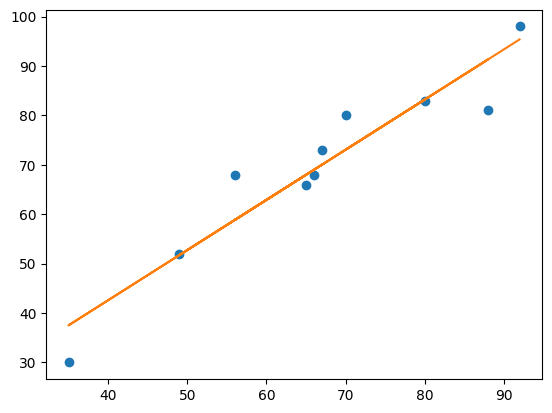

m =  1.0147371788089943
b =  2.016181407712655


In [ ]:
import matplotlib.pyplot as plt
yy=[]
for i in data['Test1']:
  yy.append(predict(m,b,i))
plt.plot(data['Test1'],data['FinalTest'],'o')
plt.plot(data['Test1'],yy,'-')
plt.show()
print('m = ',m)
print('b = ',b)

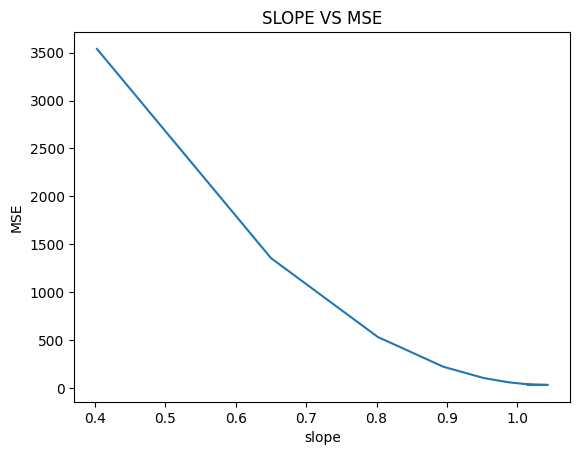

In [ ]:
plt.plot(mm,mse)
plt.title('SLOPE VS MSE')
plt.xlabel('slope')
plt.ylabel('MSE')
plt.show()

In [ ]:
print(bb)

[0.005583950794741159, 0.009017577598877682, 0.011130754775005927, 0.012433083329977683, 0.013237493989079993, 0.013736148144288269, 0.014047046354774426, 0.014242649232015922, 0.014367452668680898, 0.014448780260637095, 0.014503410610276291, 0.014541646955122054, 0.014569816204948467, 0.014591803525675318, 0.01460999468140604, 0.014625854698467692, 0.014640283205677736, 0.014653832638166076, 0.014666842229811041, 0.014679520293983762, 0.014691994749690523, 0.014704344148164458, 0.014716616725366855]


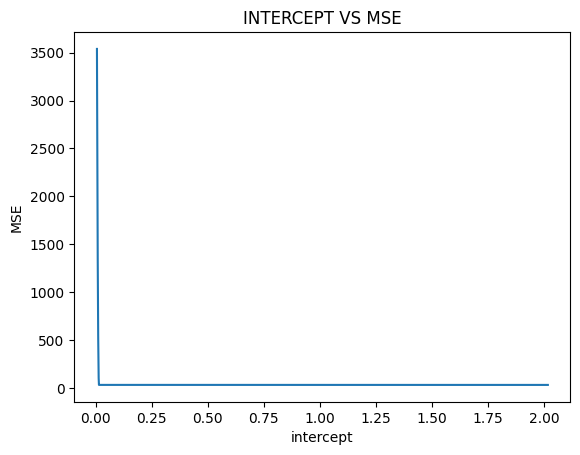

In [ ]:
plt.plot(bb,mse)
plt.title('INTERCEPT VS MSE')
plt.xlabel('intercept')
plt.ylabel('MSE')
plt.show()

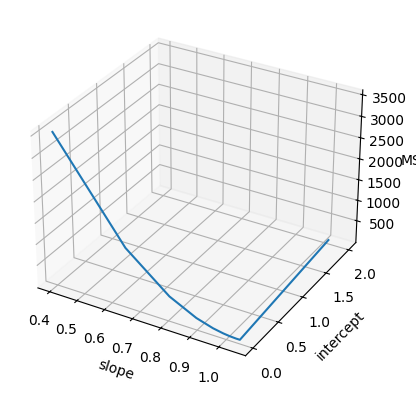

In [ ]:
fig=plt.figure()
ax=plt.axes(projection='3d')
ax.plot3D(mm,bb,mse)
ax.set_xlabel('slope')
ax.set_ylabel('intercept')
ax.set_zlabel('MSE')
plt.show()
